# Ramdom Forest Example

## Prepare Data

In [75]:
# Common imports
import numpy as np
import os

# To plot pretty figures
import matplotlib as mpl
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

#Load data
bcData = load_breast_cancer()
print(bcData.feature_names)
print(bcData.target_names)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
['malignant' 'benign']


In [67]:
#Split data
X = bcData.data
y = bcData.target

X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.45)
print(X_train[:5])
print(y_train[:5])

[[1.289e+01 1.411e+01 8.495e+01 5.122e+02 8.760e-02 1.346e-01 1.374e-01
  3.980e-02 1.596e-01 6.409e-02 2.025e-01 4.402e-01 2.393e+00 1.635e+01
  5.501e-03 5.592e-02 8.158e-02 1.370e-02 1.266e-02 7.555e-03 1.439e+01
  1.770e+01 1.050e+02 6.391e+02 1.254e-01 5.849e-01 7.727e-01 1.561e-01
  2.639e-01 1.178e-01]
 [1.881e+01 1.998e+01 1.209e+02 1.102e+03 8.923e-02 5.884e-02 8.020e-02
  5.843e-02 1.550e-01 4.996e-02 3.283e-01 8.280e-01 2.363e+00 3.674e+01
  7.571e-03 1.114e-02 2.623e-02 1.463e-02 1.930e-02 1.676e-03 1.996e+01
  2.430e+01 1.290e+02 1.236e+03 1.243e-01 1.160e-01 2.210e-01 1.294e-01
  2.567e-01 5.737e-02]
 [1.294e+01 1.617e+01 8.318e+01 5.076e+02 9.879e-02 8.836e-02 3.296e-02
  2.390e-02 1.735e-01 6.200e-02 1.458e-01 9.050e-01 9.975e-01 1.136e+01
  2.887e-03 1.285e-02 1.613e-02 7.308e-03 1.870e-02 1.972e-03 1.386e+01
  2.302e+01 8.969e+01 5.809e+02 1.172e-01 1.958e-01 1.810e-01 8.388e-02
  3.297e-01 7.834e-02]
 [1.270e+01 1.217e+01 8.088e+01 4.950e+02 8.785e-02 5.794e-02 2.360

## Decision Tree
To compare, we first analyse data with a normal Decision Tree

In [68]:
#Define and fit Decision Tree
#hyper parameter max depth
tree_clf = DecisionTreeClassifier(max_depth = 3)
tree_clf.fit(X_train,y_train)

print("tree classifier configuration")
tree_clf

tree classifier configuration


DecisionTreeClassifier(max_depth=3)

Accuracy tree score 0.9066147859922179
              precision    recall  f1-score   support

           0       0.85      0.91      0.88        96
           1       0.94      0.91      0.92       161

    accuracy                           0.91       257
   macro avg       0.90      0.91      0.90       257
weighted avg       0.91      0.91      0.91       257



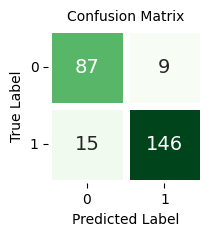

In [69]:
#Calculate Accuracy
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

y_pred = tree_clf.predict(X_test)
print("Accuracy tree score", accuracy_score(y_test, y_pred))

print(classification_report(y_test,y_pred))

#Confusion matriz
cm = confusion_matrix(y_test, y_pred)

df1 = pd.DataFrame(columns=["0","1"], index= ["0","1"], data= cm )

f,ax = plt.subplots(figsize=(2,2))

sns.heatmap(df1, annot=True,cmap="Greens", fmt= '.0f',
            ax=ax,linewidths = 5, cbar = False,annot_kws={"size": 14})
plt.xlabel("Predicted Label")
plt.xticks(size = 10)
plt.yticks(size = 10, rotation = 0)
plt.ylabel("True Label")
plt.title("Confusion Matrix", size = 10)
plt.show()

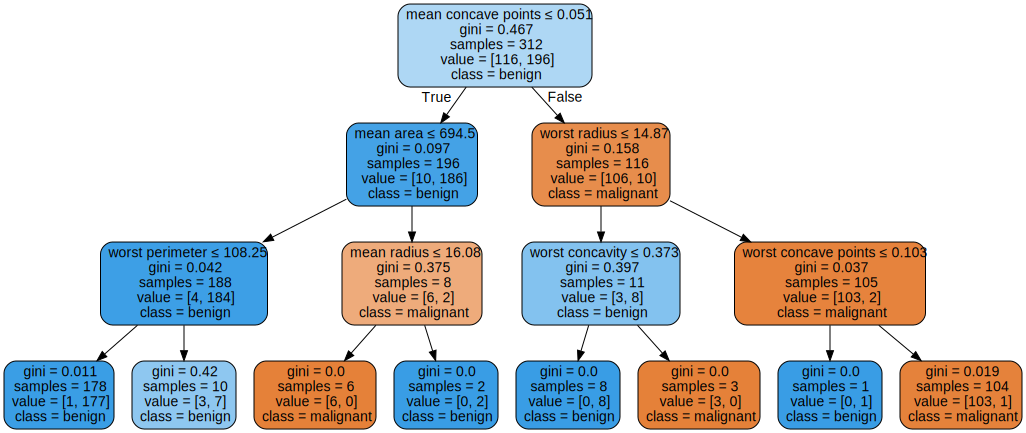

In [70]:
#Graph decision tree
from sklearn import tree
import graphviz

# dot is a graph description language
dot = tree.export_graphviz(tree_clf, out_file=None,
                           feature_names=bcData.feature_names,
                           class_names=bcData.target_names,
                           filled=True, rounded=True,
                           special_characters=True)

# we create a graph from dot source using graphviz.Source
graph = graphviz.Source(dot)
graph


## Random Forest
We now analyse the same data using a Random Forest

In [71]:
#Define and fit Random Forest
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
#n_estimators is the number of trees in the forest
#n_jobs is the number of jobs to run in parallel
rnd_clf = RandomForestClassifier(n_estimators=30, max_depth=3, n_jobs=-1, random_state=42)
rnd_clf.fit(X_train, y_train)
rnd_clf


RandomForestClassifier(max_depth=3, n_estimators=30, n_jobs=-1, random_state=42)

random forest 0.9299610894941635
              precision    recall  f1-score   support

           0       0.89      0.93      0.91        96
           1       0.96      0.93      0.94       161

    accuracy                           0.93       257
   macro avg       0.92      0.93      0.93       257
weighted avg       0.93      0.93      0.93       257



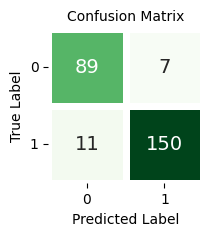

In [72]:
#Calculate accuracy
y_pred = rnd_clf.predict(X_test)
print("random forest", accuracy_score(y_test, y_pred))

print(classification_report(y_test,y_pred))

#Confusion matriz
cm = confusion_matrix(y_test, y_pred)

df1 = pd.DataFrame(columns=["0","1"], index= ["0","1"], data= cm )

f,ax = plt.subplots(figsize=(2,2))

sns.heatmap(df1, annot=True,cmap="Greens", fmt= '.0f',
            ax=ax,linewidths = 5, cbar = False,annot_kws={"size": 14})
plt.xlabel("Predicted Label")
plt.xticks(size = 10)
plt.yticks(size = 10, rotation = 0)
plt.ylabel("True Label")
plt.title("Confusion Matrix", size = 10)
plt.show()

In [73]:
#Number of trees in the random forest
print(len(rnd_clf.estimators_))

30


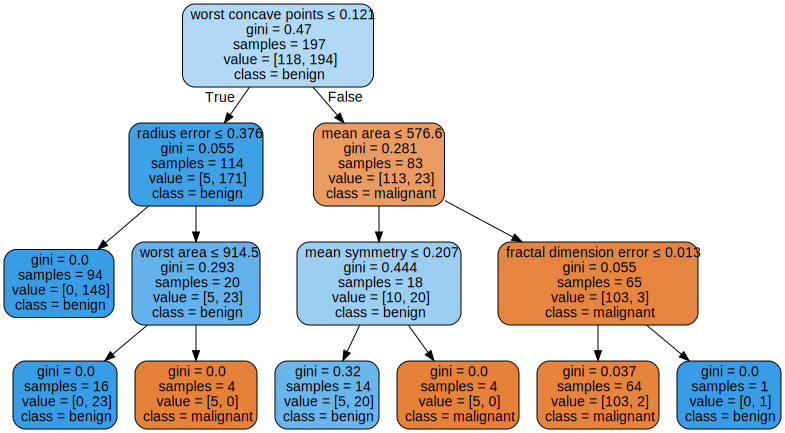

In [74]:
#Graph one of the trees in the forest
from sklearn import tree
import graphviz

# dot is a graph description language
dot = tree.export_graphviz(rnd_clf.estimators_[0], #First tree in the random forest
                           out_file=None,
                           feature_names=bcData.feature_names,
                           class_names=bcData.target_names,
                           filled=True, rounded=True,
                           special_characters=True)

# we create a graph from dot source using graphviz.Source
graph = graphviz.Source(dot)
graph